## EDA MAIN

### A. Dataset Load

In [25]:
import pandas as pd

file_path = './teamData(14-23).csv'

# Import a CSV file and convert it to a pandas dataframe
try:
    team_data = pd.read_csv(file_path)
    message = "Dataframe has been successfully created."
except Exception as e:
    team_data = None
    message = f"Dataframe creation has been failed: {e}"

print(message)

Dataframe has been successfully created.


In [26]:
print(team_data.shape)

column_names = team_data.columns.tolist()
print(column_names)


(99, 81)
['Year', '순위', '팀명', '경기', '승', '패', '무', '승률', '게임차', '최근10경기', '연속', '홈', '방문', 'Hitter_AVG', 'Hitter_PA', 'Hitter_AB', 'Hitter_R', 'Hitter_H', 'Hitter_2B', 'Hitter_3B', 'Hitter_HR', 'Hitter_TB', 'Hitter_RBI', 'Hitter_SAC', 'Hitter_SF', 'Hitter_BB', 'Hitter_IBB', 'Hitter_HBP', 'Hitter_SO', 'Hitter_GDP', 'Hitter_SLG', 'Hitter_OBP', 'Hitter_OPS', 'Hitter_MH', 'Hitter_RISP', 'Hitter_PH-BA', 'Pitcher_ERA', 'Pitcher_W', 'Pitcher_L', 'Pitcher_SV', 'Pitcher_HLD', 'Pitcher_WPCT', 'Pitcher_IP', 'Pitcher_H', 'Pitcher_HR', 'Pitcher_BB', 'Pitcher_HBP', 'Pitcher_SO', 'Pitcher_R', 'Pitcher_ER', 'Pitcher_WHIP', 'Pitcher_CG', 'Pitcher_SHO', 'Pitcher_QS', 'Pitcher_BSV', 'Pitcher_TBF', 'Pitcher_NP', 'Pitcher_AVG', 'Pitcher_2B', 'Pitcher_3B', 'Pitcher_SAC', 'Pitcher_SF', 'Pitcher_IBB', 'Pitcher_WP', 'Pitcher_BK', 'Defense_E', 'Defense_PKO', 'Defense_PO', 'Defense_A', 'Defense_DP', 'Defense_FPCT', 'Defense_PB', 'Defense_SB', 'Defense_CS', 'Defense_CS%', 'Runner_SBA', 'Runner_SB', 'Runner_CS', '

### B. Yearly Approach

#### B-1. Replace Changed Team Name

In [39]:
# Define a dictionary for team name changes
team_name_changes = {
    '넥센': 'Heroes',
    'SK': 'Landers',
    '삼성': 'Lions',
    '키움': 'Heroes',
    '두산': 'Bears',
    '롯데': 'Giants',
    'NC': 'Dinos',
    'LG': 'Twins',
    '한화': 'Eagles',
    'KIA': 'Tigers',
    'SSG': 'Landers',
    'KT': 'Wizs'
}

# Remove any leading and trailing spaces from the '팀명' column
team_data['팀명'] = team_data['팀명'].str.strip()

# Convert all team names to uppercase to avoid case sensitivity issues
team_data['팀명'] = team_data['팀명'].str.upper()

# Apply the team name changes
team_data['팀명'] = team_data['팀명'].replace(team_name_changes)

# Check the modified data
print(team_data)

    Year  순위       팀명   경기   승   패  무     승률   게임차  최근10경기  ... Defense_PB  \
0   2023   1    Twins  144  86  56  2  0.606   0.0  5승0무5패  ...         10   
1   2023   2     Wizs  144  79  62  3  0.560   6.5  6승0무4패  ...          3   
2   2023   3  Landers  144  76  65  3  0.539   9.5  8승0무2패  ...         11   
3   2023   4    Dinos  144  75  67  2  0.528  11.0  5승0무5패  ...          7   
4   2023   5    Bears  144  74  68  2  0.521  12.0  4승0무6패  ...         12   
..   ...  ..      ...  ...  ..  .. ..    ...   ...     ...  ...        ...   
94  2014   5  Landers  128  61  65  2  0.484  17.5  6승1무3패  ...          6   
95  2014   6    Bears  128  59  68  1  0.465  20.0  6승0무4패  ...          7   
96  2014   7   Giants  128  58  69  1  0.457  21.0  5승0무5패  ...         11   
97  2014   8   Tigers  128  54  74  0  0.422  25.5  3승0무7패  ...          7   
98  2014   9   Eagles  128  49  77  2  0.389  29.5  2승0무8패  ...         12   

   Defense_SB Defense_CS  Defense_CS%  Runner_SBA  Runner_SB  R

#### B-2. Split by Year

In [46]:
# Group the data by the 'Year' column.
grouped = team_data.groupby('Year')

# Create a separate dataframe for each year.
yearly_dataframes = {year: group for year, group in grouped}

# Example
# print(yearly_dataframes[2014])
print(yearly_dataframes[2014]['팀명'])

90      Lions
91     Heroes
92      Dinos
93      Twins
94    Landers
95      Bears
96     Giants
97     Tigers
98     Eagles
Name: 팀명, dtype: object


In [47]:
print(yearly_dataframes[2014]['팀명'])
print()
print(yearly_dataframes[2023]['팀명'])

90      Lions
91     Heroes
92      Dinos
93      Twins
94    Landers
95      Bears
96     Giants
97     Tigers
98     Eagles
Name: 팀명, dtype: object

0      Twins
1       Wizs
2    Landers
3      Dinos
4      Bears
5     Tigers
6     Giants
7      Lions
8     Eagles
9     Heroes
Name: 팀명, dtype: object


In [33]:
print(yearly_dataframes[2014])

    Year  순위   팀명   경기   승   패  무     승률   게임차  최근10경기  ... Defense_PB  \
90  2014   1   삼성  128  78  47  3  0.624   0.0  3승0무7패  ...          8   
91  2014   2   키움  128  78  48  2  0.619   0.5  7승1무2패  ...          7   
92  2014   3   NC  128  70  57  1  0.551   9.0  6승0무4패  ...          9   
93  2014   4   LG  128  62  64  2  0.492  16.5  6승0무4패  ...          9   
94  2014   5  SSG  128  61  65  2  0.484  17.5  6승1무3패  ...          6   
95  2014   6   두산  128  59  68  1  0.465  20.0  6승0무4패  ...          7   
96  2014   7   롯데  128  58  69  1  0.457  21.0  5승0무5패  ...         11   
97  2014   8  KIA  128  54  74  0  0.422  25.5  3승0무7패  ...          7   
98  2014   9   한화  128  49  77  2  0.389  29.5  2승0무8패  ...         12   

   Defense_SB Defense_CS  Defense_CS%  Runner_SBA  Runner_SB  Runner_CS  \
90        100         44         30.6         207        161         46   
91        118         44         27.2         144        100         44   
92         94         43         3

#### B-3. Yearly Data Visualization

In [50]:
import matplotlib.pyplot as plt

all_years_data = pd.concat(yearly_dataframes.values())
grouped_by_team = all_years_data.groupby('팀명')

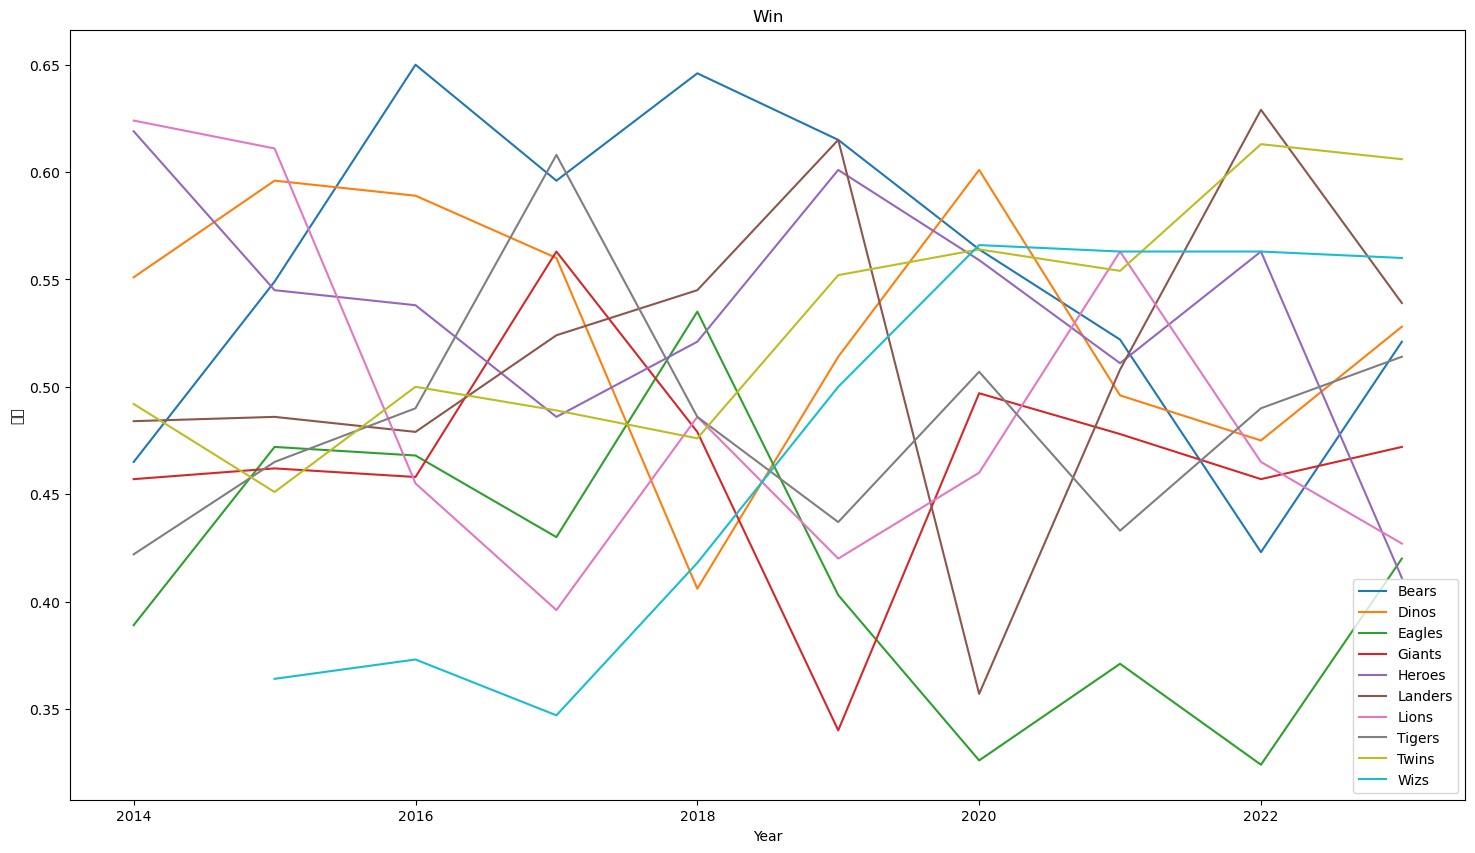

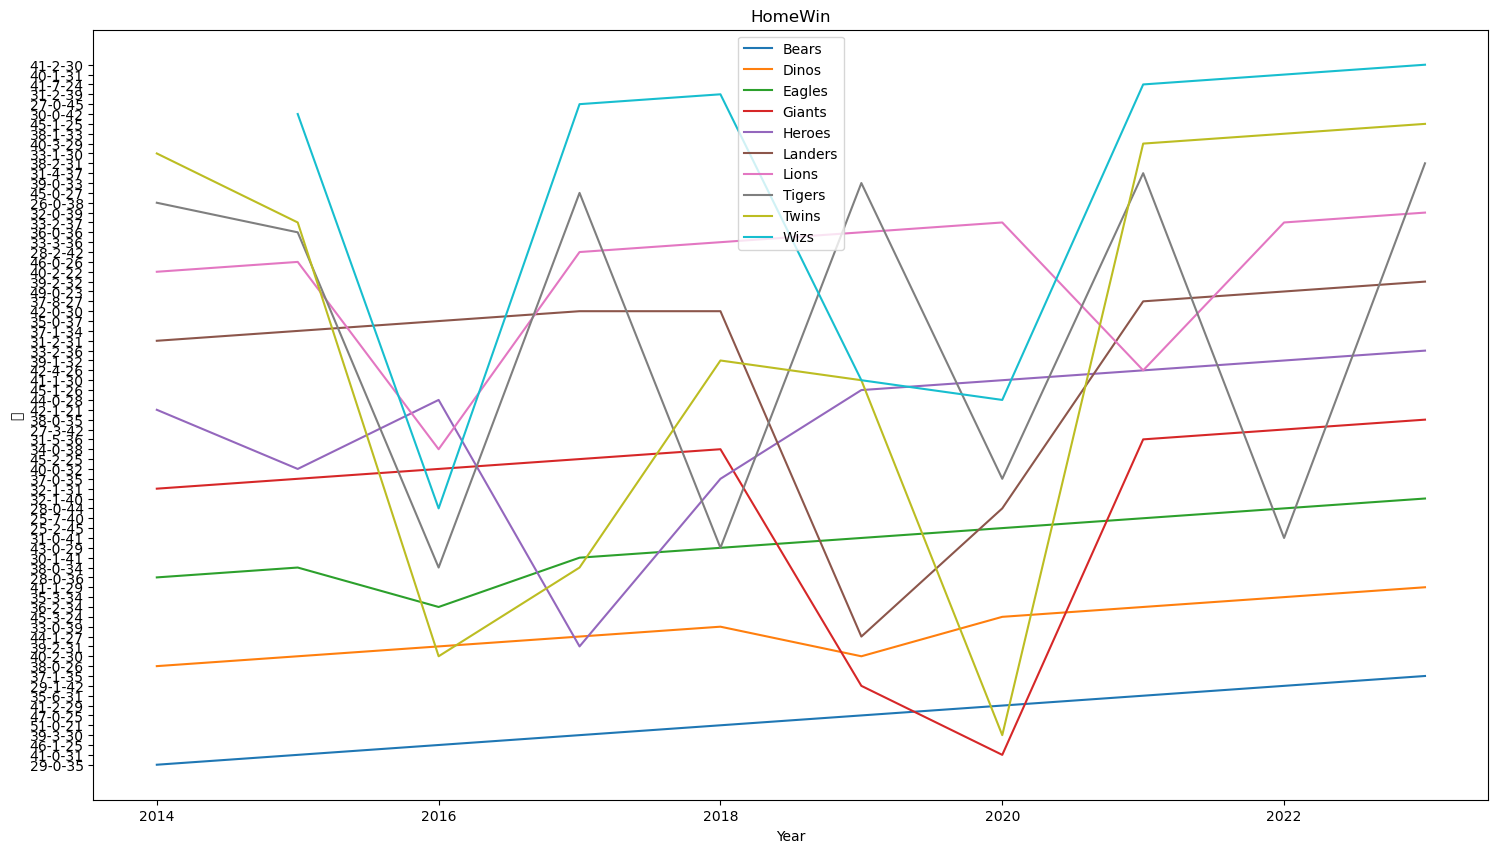

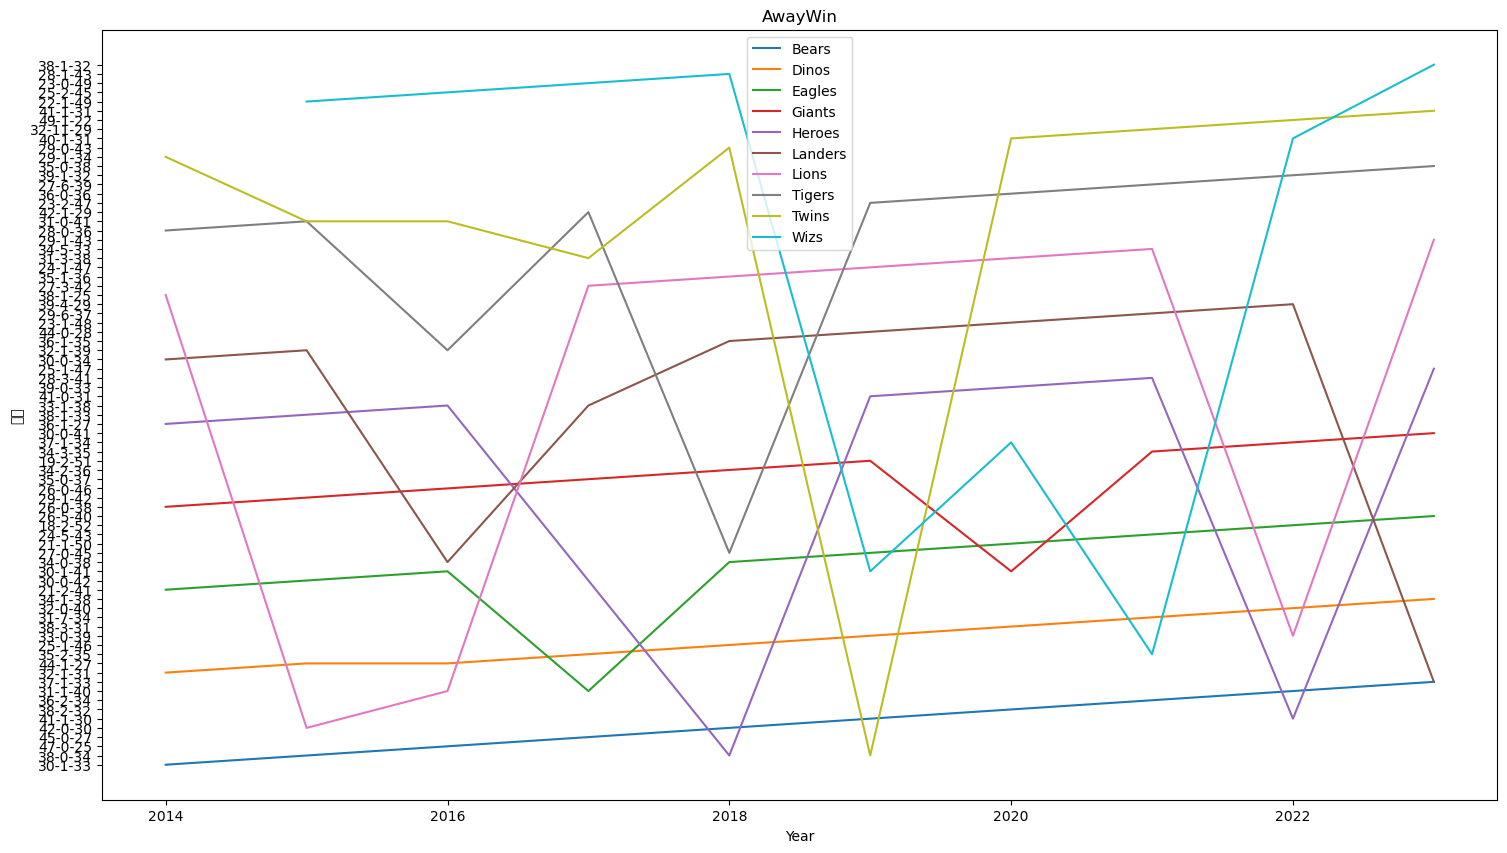

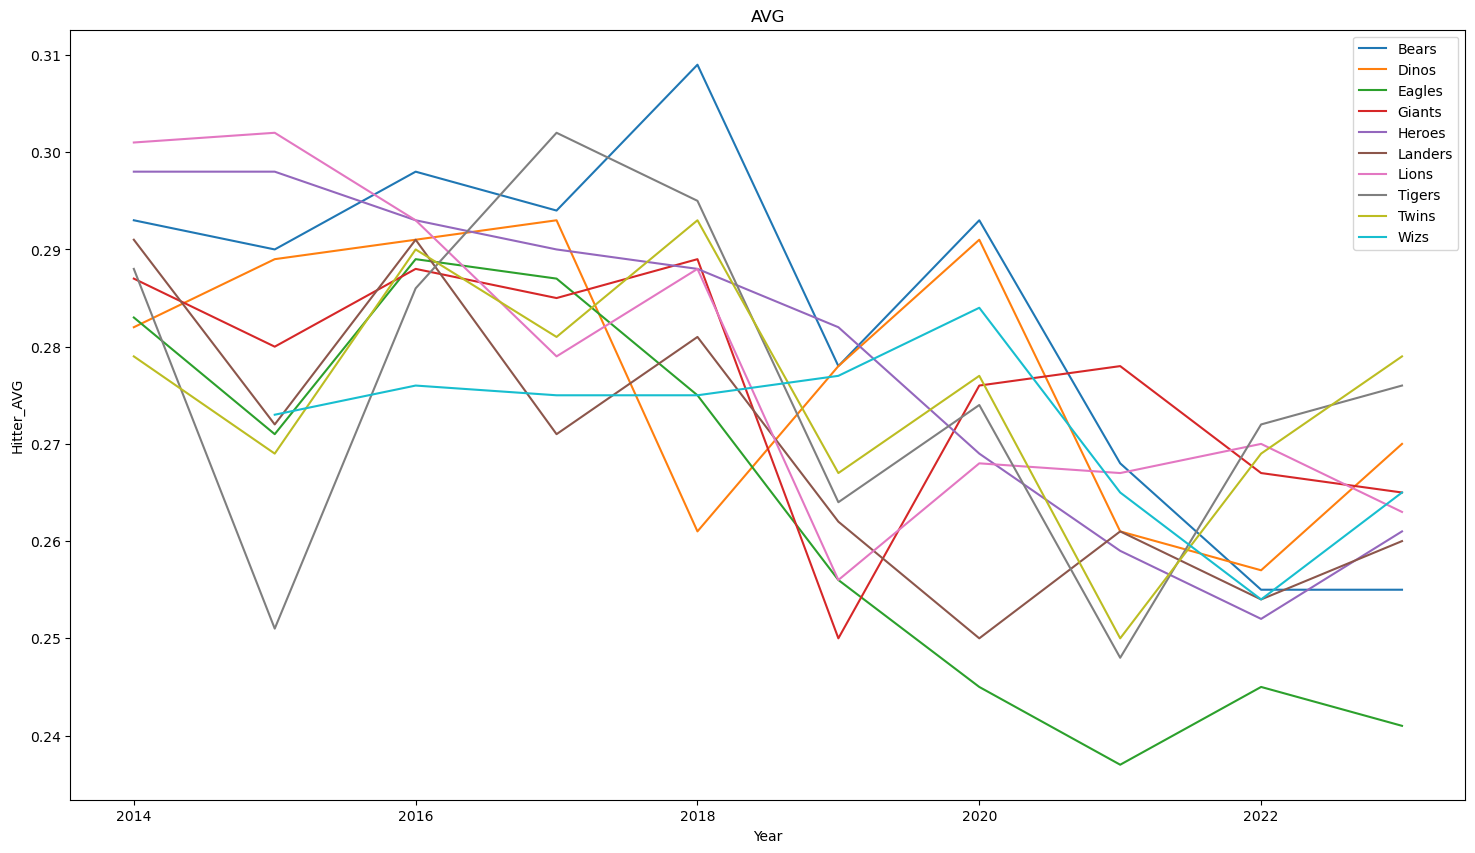

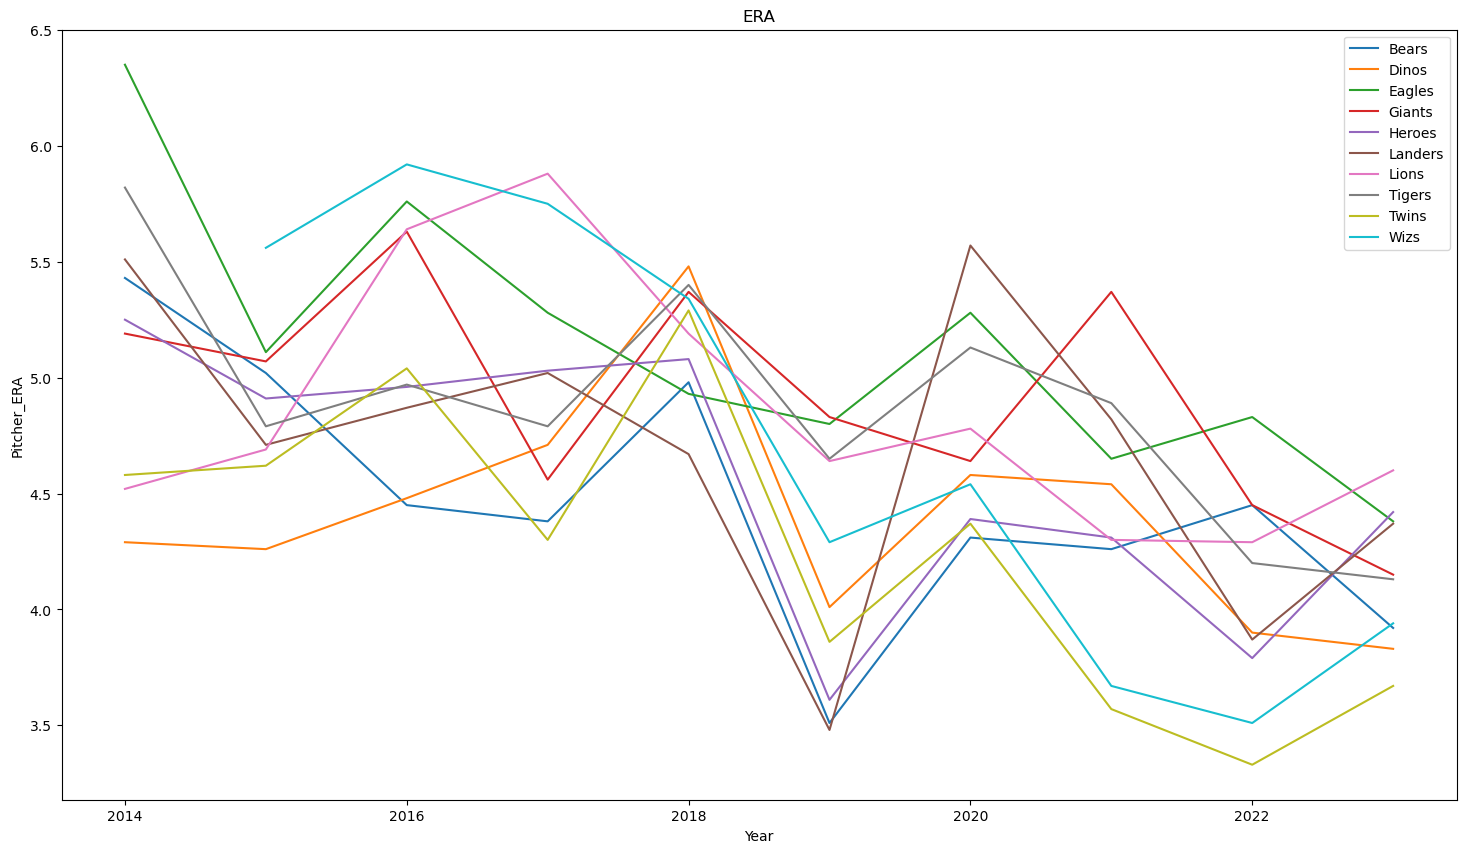

In [58]:
columns_of_interest = ['승률', '홈', '방문', 'Hitter_AVG', 'Pitcher_ERA']
column_name = ['Win', 'HomeWin', 'AwayWin', 'AVG', 'ERA']

# plot for each column
i=0
plt.figure

for column in columns_of_interest:
    plt.figure(figsize=(18, 10))
    for team, data in grouped_by_team:
        plt.plot(data['Year'], data[column], label=team)

    plt.title(f"{column_name[i]}")
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.legend()
    plt.show()
    i=i+1